# Life Expectancy and GDP Portfolio Project (Codecademy Data Science)

As part of the Codecademy Data Science course, I was tasked with creating visualisations based on life expectancy and GDP data taken from the World Bank and World Health Organisation. The project is intended as an opportunity to demonstrate data preparation and visualisation skills. 

The goal of my project is to answer whether life expectancy and GDP have improved over time, whether country of birth or when you were born is more important for determining life expectancy and GDP, and whether GDP and life expectancy are correlated.

More specifically, the project will seek to answer these four questions:
1. To what extent has life expectancy improved over time, both on average and by country?
2. To what extent has GDP improved over time, both on average and by country?
3. Is your country of birth or when you were born more important for determining your life expectancy? What about the GDP of the nation you live in?
4. To what extent are GDP and life expectancy correlated? Does GDP matter independent of your country of birth in determining your life expectancy?

The data comes from the following sources:
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

### Importing Modules, Loading Data

In [272]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [273]:
df = pd.read_csv('all_data.csv')

# Question 1: To what extent has life expectancy improved over time, both on average and by country?

Text(0.5, 1.0, 'Life Expectancy at Birth Over Time by Country')

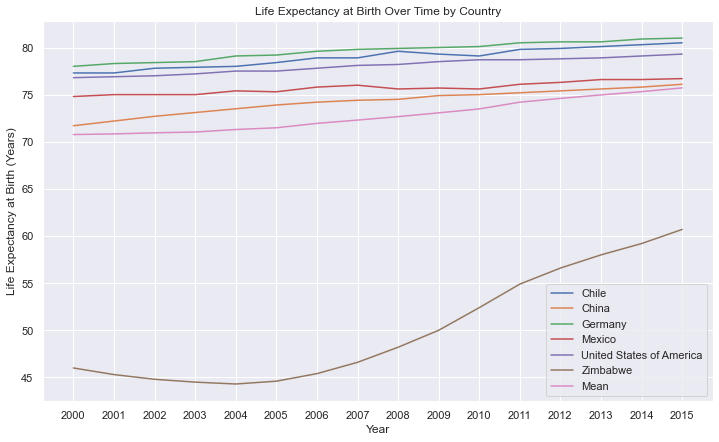

In [274]:
# Creating a pivot table
df_pivot_LE = df.pivot(index='Year', columns='Country', values='Life expectancy at birth (years)')
# Adding a 'Mean' column
df_pivot_LE['Mean'] = df_pivot_LE.mean(axis=1)

plt.figure(figsize=[12,7])
sns.set_style("darkgrid")
for i in df_pivot_LE.columns:
    sns.lineplot(x='Year', y=i, data= df_pivot_LE, label=i)
plt.legend()
plt.xticks(df_pivot_LE.index)
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.title('Life Expectancy at Birth Over Time by Country')

We can see that there is a general upward trend, but the magnitude of this increase is hard to see because of the inclusion of a serious outlier: Zimbabwe. This does, of course, tell us something very important about how poor life expectancy in Zimbabwe is, which is an important insight, but Zimbabwe's inclusion prevents us from seeing the rest of the data clearly.

To address this issue, I have plotted below the same graph with Zimbabwe removed, and then a second graph comparing Zimbabwe to the average. For both of these graphs, I have used the mean of the top 5 countries (i.e. all the countries except Zimbabwe) in order to make the mean more legible.

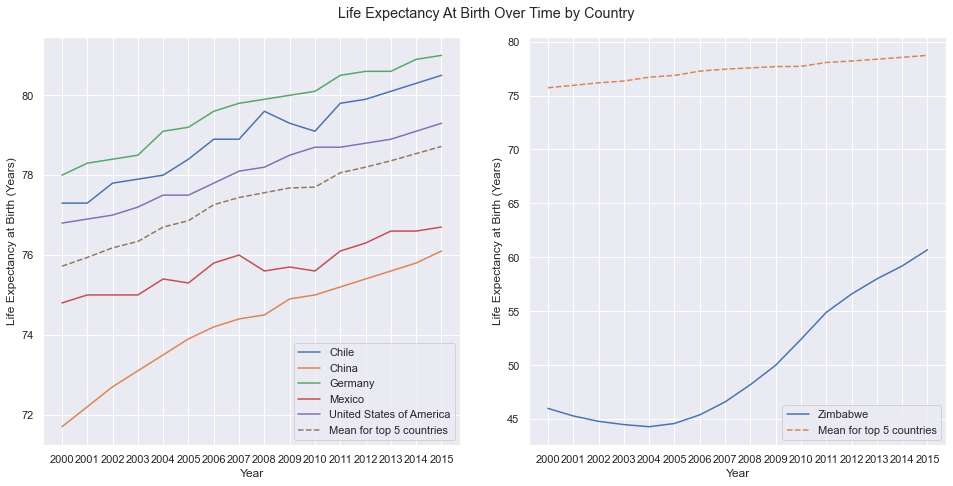

In [275]:
# Adding a 'Mean for top 5 countries' column
df_pivot_LE['Mean for top 5 countries'] = df_pivot_LE.iloc[:, [0,1,2,3,4]].mean(axis=1)
# Name of countries for use in looping plots
col = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.tight_layout(pad=3.0)
fig.suptitle('Life Expectancy At Birth Over Time by Country')

for i in col[:-1]:
    sns.lineplot(ax=axes[0], x='Year', y=i, data= df_pivot_LE, label=i)
sns.lineplot(ax=axes[0], x='Year', y='Mean for top 5 countries', data= df_pivot_LE, label='Mean for top 5 countries', linestyle='--')
axes[0].set_xticks(df_pivot_LE.index)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Life Expectancy at Birth (Years)')
axes[0].legend()

sns.lineplot(ax=axes[1], x='Year', y='Zimbabwe', data= df_pivot_LE, label='Zimbabwe')
sns.lineplot(ax=axes[1], x='Year', y='Mean for top 5 countries', data= df_pivot_LE, label='Mean for top 5 countries', linestyle='--')
axes[1].set_xticks(df_pivot_LE.index)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Life Expectancy at Birth (Years)')
axes[1].legend()

As we can see from the first graph, all of the countries except Mexico see a fairly smooth upward trend over time with roughly equivalent gradients. Mexico is somewhat distinct in that it has a flatter gradient, but even Mexico shows a slight upward trend.

The second graph (especially in conjunction with the first - note the y axis!) simply serves to illustrate the extent to which Zimbabwe is an unfortunate outlier here - both in terms of the distance from the mean and the shape of the curve.

# Question 2: To what extent has GDP improved over time, both on average and by country?

Text(0.5, 1.0, 'GDP Over Time by Country')

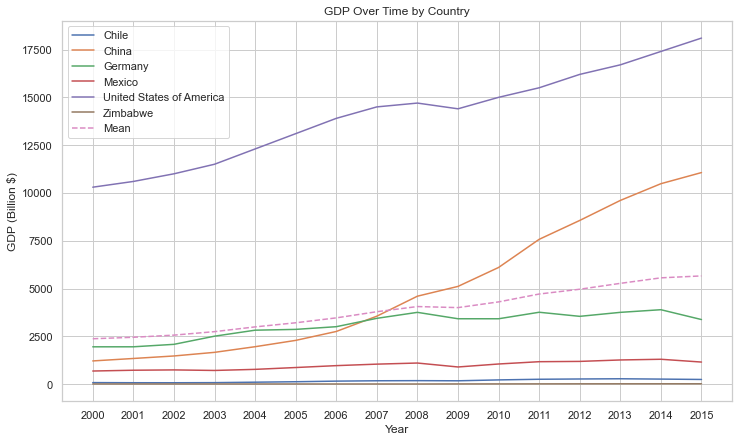

In [276]:
# Dividing the entire dataframe by a billion
df['GDP'] = df['GDP'].divide(1000000000)
# Rounding to nearest two decimal places
df['GDP'] = df['GDP'].round(2)
# Creating a pivot table
df_pivot_GDP = df.pivot(index='Year', columns='Country', values='GDP')
# Adding a 'Mean' column
df_pivot_GDP['Mean'] = df_pivot_GDP.mean(axis=1)

plt.figure(figsize=[12,7])
sns.set_style("whitegrid")
for i in col:
    sns.lineplot(x='Year', y=i, data= df_pivot_GDP, label=i)
sns.lineplot(x='Year', y='Mean', data= df_pivot_GDP, label='Mean', linestyle='--')
plt.legend()
plt.xticks(df_pivot_GDP.index)
plt.xlabel('Year')
plt.ylabel('GDP (Billion $)')
plt.title('GDP Over Time by Country')

This graph clearly demonstrates an astonishing amount of disparity in national GDP, and a gradual increase in mean GDP, but it doesn't do much more than that! To address this issue, I have plotted the same graph below for the top 4 and bottom 2 countries. For both of these graphs, I have used the mean of top 4 countries and bottom 2 countries, respectively.

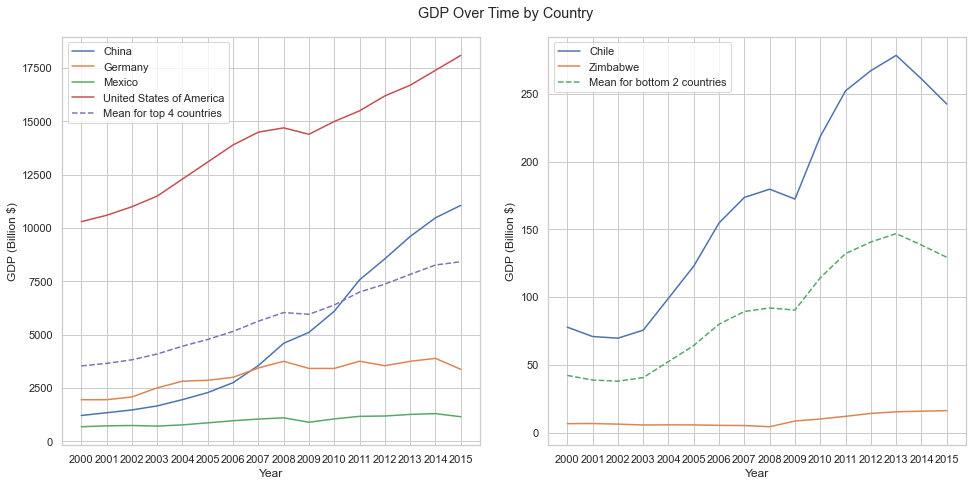

<Figure size 864x504 with 0 Axes>

In [277]:
# Adding a 'Mean for top 4 countries' column
df_pivot_GDP['Mean for top 4 countries'] = df_pivot_GDP.iloc[:, [1,2,3,4]].mean(axis=1)
# Adding a 'Mean for bottom 2 countries' column
df_pivot_GDP['Mean for bottom 2 countries'] = df_pivot_GDP.iloc[:, [0,5]].mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.tight_layout(pad=3.0)
fig.suptitle('GDP Over Time by Country')
plt.figure(figsize=[12,7])
sns.set_style("whitegrid")

sns.lineplot(ax=axes[0], x='Year', y='China', data= df_pivot_GDP, label='China')
sns.lineplot(ax=axes[0], x='Year', y='Germany', data= df_pivot_GDP, label='Germany')
sns.lineplot(ax=axes[0], x='Year', y='Mexico', data= df_pivot_GDP, label='Mexico')
sns.lineplot(ax=axes[0], x='Year', y='United States of America', data= df_pivot_GDP, label='United States of America')
sns.lineplot(ax=axes[0], x='Year', y='Mean for top 4 countries', data= df_pivot_GDP, label='Mean for top 4 countries', linestyle='--')
axes[0].set_xticks(df_pivot_GDP.index)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP (Billion $)')
axes[0].legend()

sns.lineplot(ax=axes[1], x='Year', y='Chile', data= df_pivot_GDP, label='Chile')
sns.lineplot(ax=axes[1], x='Year', y='Zimbabwe', data= df_pivot_GDP, label='Zimbabwe')
sns.lineplot(ax=axes[1], x='Year', y='Mean for bottom 2 countries', data= df_pivot_GDP, label='Mean for bottom 2 countries', linestyle='--')
axes[1].set_xticks(df_pivot_GDP.index)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP (Billion $)')
axes[1].legend()

These graphs are much more informative! 

To take the first graph first, we can see that China, Mexico, and Germany started comparatively similarly (at under 2500 billion USD), but from this starting point, their trajectory is hugely different. China's GDP has evidently undergone explosive growth, as opposed to Germany's slow growth and Mexico's slightly slower growth. The US is clearly in a league of its own, although it is notable that its growth is substantially steeper than Germany or Mexico's.

The second graph reveals the trends of the bottom two countries, which were hidden by the large GDP disparities in the graph that included all six countries. We can now see Chile's substantial, if somewhat volatile, increases in GDP in a way we couldn't before we isolated the two poorest countries. Regrettably, this graph also reveals Zimbabwe's outlier status in terms of GDP, with their GDP growth being extremely slow, while also starting from a low baseline. From the shape of the mean line, we can also see that virtually all of the growth in the two countries is coming from Chile, further emphasising the outlier status of Zimbabwe.

# Question 3: Is your country of birth or when you were born more important for determining your life expectancy? What about for the GDP of the nation you live in?

Text(0.5, 1.0, 'Distribution of Life Expectancy at Birth between 2000 and 2015 by Country')

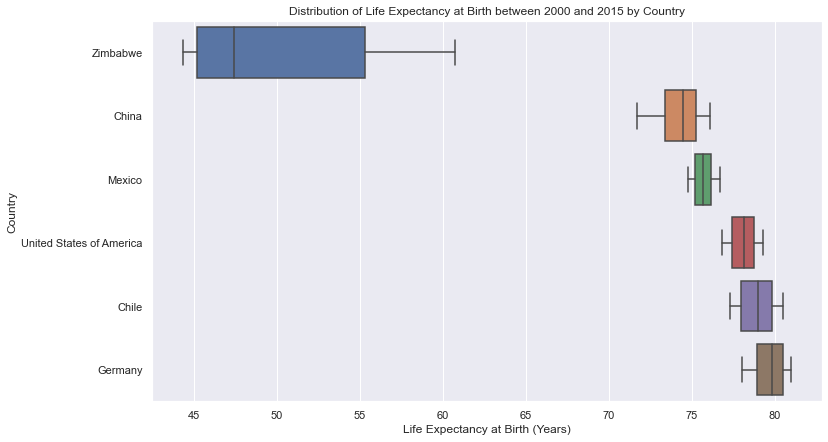

In [278]:
plt.figure(figsize=[12,7])
sns.set_theme()
sns.color_palette('colorblind')
sns.boxplot(x='Life expectancy at birth (years)', y='Country', data=df, order=('Zimbabwe', 'China', 'Mexico', 'United States of America', 'Chile', 'Germany'))
plt.xlabel('Life Expectancy at Birth (Years)')
plt.title('Distribution of Life Expectancy at Birth between 2000 and 2015 by Country')

These boxplots show the range of life expectancies in each country over the fifteen years. Where the boxplots of two countries have substantial overlap, *when* you were born is more significant. When there is little or no overlap, *where* you were born is more significant.

It seems fairly evident that, if the country you were born in is Zimbabwe, your country of birth matters far more than when you were born! Unfortunately, no matter when you were born in this fifteen year period, being born in Zimbabwe is always worse than being born *at any time* in *every single other country*. The effect of birthplace is less pronounced in our other five countries, but still very much present (for example, it is better in terms of life expectancy to be born in Germany at any time than in China at its peak life expectancy during this period). 

Text(0.5, 1.0, 'Distribution of GDP between 2000 and 2015 by Country')

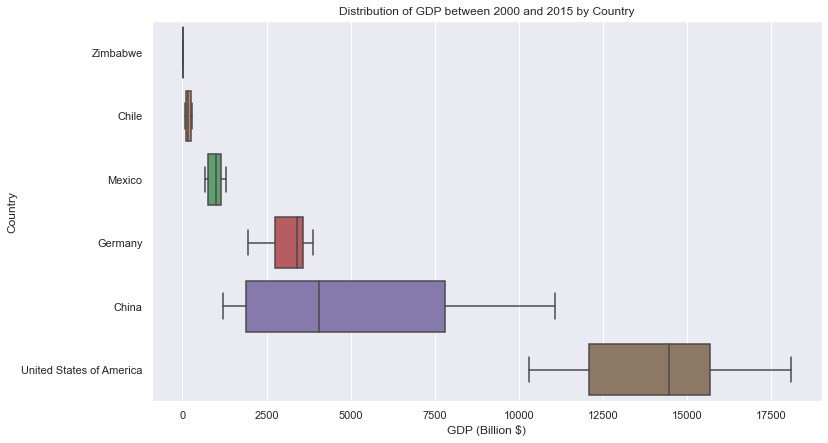

In [279]:
plt.figure(figsize=[12,7])
sns.set_theme()
sns.color_palette('colorblind')
sns.boxplot(x='GDP', y='Country', data=df, order=('Zimbabwe', 'Chile', 'Mexico', 'Germany', 'China', 'United States of America'))
plt.xlabel('GDP (Billion $)')
plt.title('Distribution of GDP between 2000 and 2015 by Country')

These boxplots show the range of GDP in each country over the fifteen years. Where the boxplots of two countries have substantial overlap, *when* you were born is more significant. When there is little or no overlap, *where* you were born is more significant.

While there is more overlap between countries in this graph, it seems clear that for most dyads, where you were born is likely a better predictive factor for your country's GDP than when you were born. This is somewhat confounded, however, by the explosive growth of some countries in this period, particularly China, where the GDP has hugely increased over time.

# Question 4: To what extent are GDP and life expectancy correlated? Does GDP matter independent of your country of birth in determining your life expectancy?

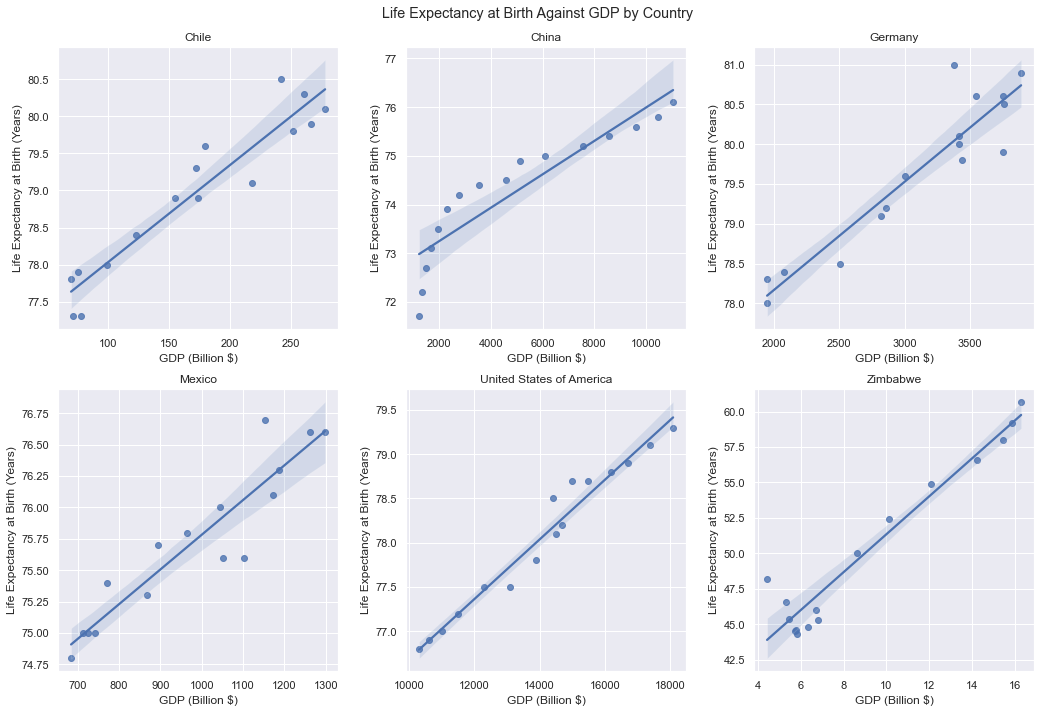

In [280]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=3.0)
fig.suptitle('Life Expectancy at Birth Against GDP by Country', y=1)

for c, v in enumerate(col[:3]):
    sns.regplot(ax=axes[0, c], x='GDP', y='Life expectancy at birth (years)', data=df[df.Country == v])
    axes[0, c].set_title(v)
    axes[0, c].set_xlabel('GDP (Billion $)')
    axes[0, c].set_ylabel('Life Expectancy at Birth (Years)')
for c, v in enumerate(col[3:]):
    sns.regplot(ax=axes[1, c-3], x='GDP', y='Life expectancy at birth (years)', data=df[df.Country == v])
    axes[1, c-3].set_title(v)
    axes[1, c-3].set_xlabel('GDP (Billion $)')
    axes[1, c-3].set_ylabel('Life Expectancy at Birth (Years)')

From the below, we can clearly see that GDP and life expectancy are correlated, and that this correlation holds independent of your country of birth. There is a direct correlation between GDP and life expectancy in all six graphs.

However, take a look at the differences between the X and Y axes in each of the plots! They are wildly different, as we would expect when comparing countries as varied as the US and Zimbabwe. What happens if we equalise the Y axes so that we can see the relative increases in life expectancy?

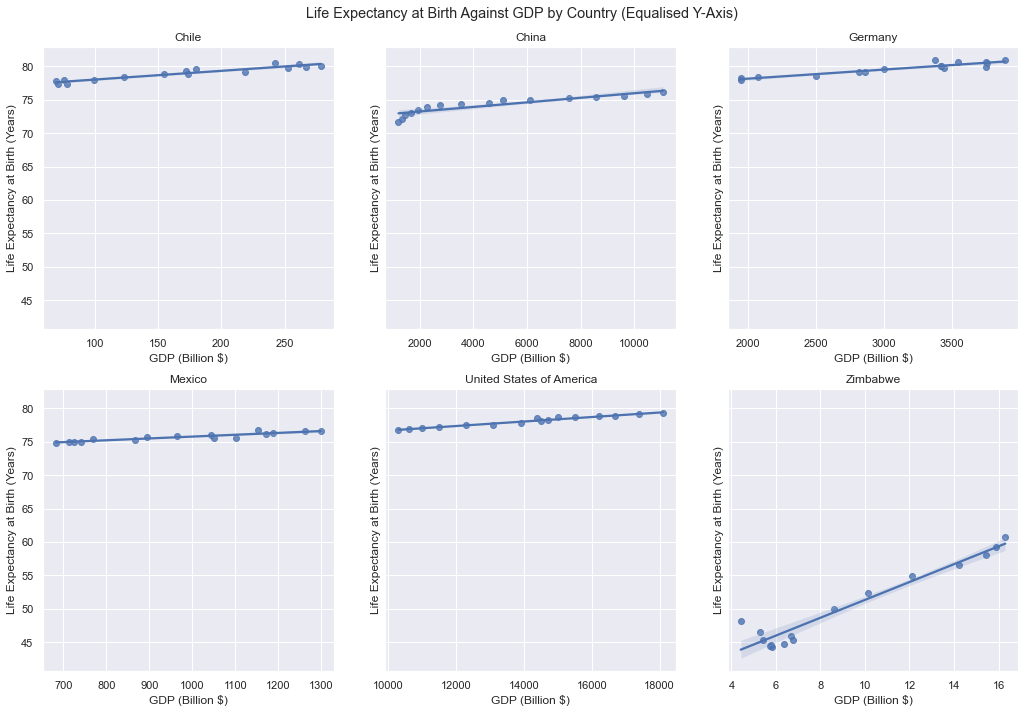

In [281]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
fig.tight_layout(pad=3.0)
fig.suptitle('Life Expectancy at Birth Against GDP by Country (Equalised Y-Axis)', y=1)

for c, v in enumerate(col[:3]):
    sns.regplot(ax=axes[0, c], x='GDP', y='Life expectancy at birth (years)', data=df[df.Country == v])
    axes[0, c].set_title(v)
    axes[0, c].set_xlabel('GDP (Billion $)')
    axes[0, c].set_ylabel('Life Expectancy at Birth (Years)')
for c, v in enumerate(col[3:]):
    sns.regplot(ax=axes[1, c-3], x='GDP', y='Life expectancy at birth (years)', data=df[df.Country == v])
    axes[1, c-3].set_title(v)
    axes[1, c-3].set_xlabel('GDP (Billion $)')
    axes[1, c-3].set_ylabel('Life Expectancy at Birth (Years)')

Here we can clearly see that, if it is the case that increases in GDP drive increases in life expectancy (something that is definitely not proven by this analysis!), there are clearly *diminishing marginal returns*.

Looking at the first five graphs, we can see fairly even gradients - but look at the X Axes! The rougly equal increases in life expectancy are not matched by equal increases in GDP; rather, some countries have undergone huge increases in GDP (in absolute terms relative to others), but have increased their life expectancies by similar amounts. 

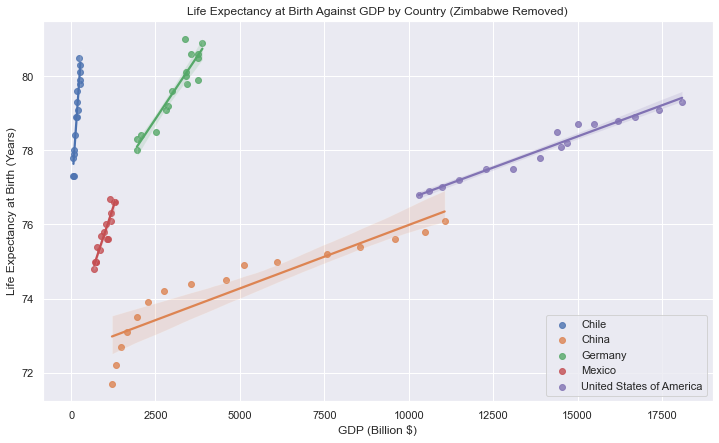

In [292]:
plt.figure(figsize=[12,7])
sns.set_style("darkgrid")
for i in col[:-1]:
    sns.regplot(x='GDP', y='Life expectancy at birth (years)', data=df[df.Country == i], label=i)
    plt.xlabel('GDP (Billion $)')
    plt.ylabel('Life Expectancy at Birth (Years)')
    plt.legend()
    plt.title('Life Expectancy at Birth Against GDP by Country (Zimbabwe Removed)')

These graphs reinforce the impression of the above in terms of diminishing marginal returns - we can see that the more GDP a country has, the shallower the gradient of the line (i.e. the increase in the amount of life expectancy you get out for GDP you put in) is.

Overall, I would argue that it is clear that GDP and life expectancy are correlated and that GDP is a useful predictive factor independent of country of birth in determining ones life expectancy, but the diminishing marginal returns of increased GDP seem very steep.

There are two obvious limitations to this analysis. 

The first is that it is somewhat unintuitive to use GDP rather than GDP per capita when comparing against life expectancy (which is, obviously, a 'per capita' metric). Using GDP per capita stats alongside absolute GDP would have improved the analysis.

The second limitation is that correlation does not imply causation, and that is particularly clear in this analysis. As both life expectancy and GDP increased over time in all countries, it may be there is no causality at all between the two, but rather we are seeing a period of history where both of those things are increasing with no causal relationship. In addition, the fact that the increases in life expectancy were so uniform (bar Zimbabwe, our perennial outlier), while increases in GDP were wildly different, makes me sceptical that we can straightforwardly argue that increases in GDP leads to increases in life expectancy.

# Conclusion

The project started by posing four questions; we can now offer some provisional conclusions. 

**1. To what extent has life expectancy improved over time, both on average and by country?**
- There is a general upward trend across all countries, with all countries except Zimbabwe and Mexico having a smooth upward trend. Zimbabwe is an unfortunate outlier in having incredibly low life expectancy.

**2. To what extent has GDP improved over time, both on average and by country?**
- There is a general upward trend across all countries. China has experienced explosive growth, and the US consistent growth, and Zimbabwe, regrettably, almost no growth.

**3. Is your country of birth or when you were born more important for determining your life expectancy? What about the GDP of the nation you live in?**
- Life expectancy seems more determined by nation of birth than timing of birth, especially in the case of Zimbabwe; being born in Zimbabwe was always worse than being born *at any time* in *every single other country*. This is less true for GDP; where you were born is likely a better predictive factor for your country's GDP than when you were born, but this is somewhat confounded by the explosive growth of some countries in this period, particularly China.

**4. To what extent are GDP and life expectancy correlated? Does GDP matter independent of your country of birth in determining your life expectancy?**
- GDP and life expectancy are correlated and that GDP is a useful predictive factor independent of country of birth in determining ones life expectancy, but the diminishing marginal returns of increased GDP seem very steep.